Selected file: C:\Users\afroz\Desktop\PICKLEFILE\GW230529.hdf5


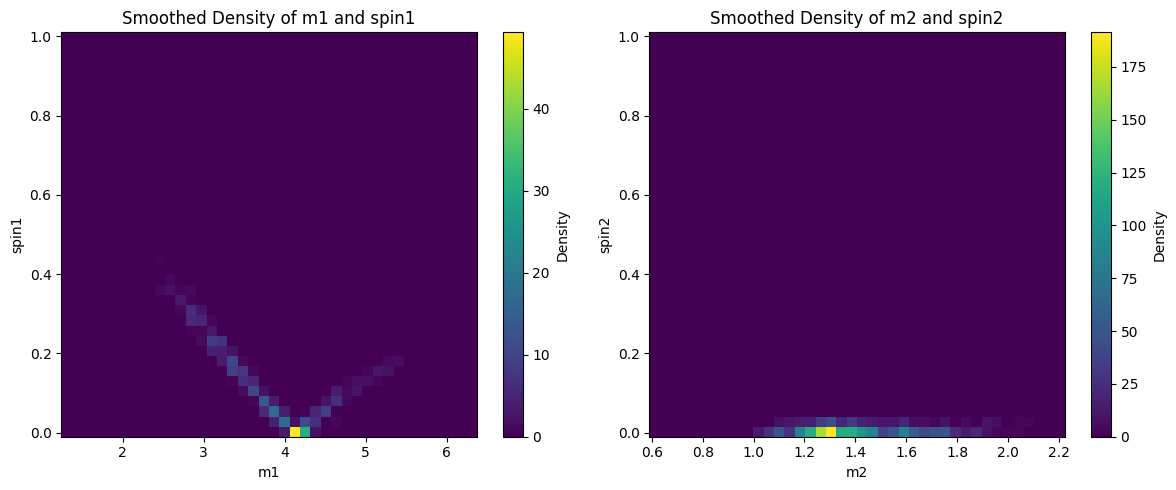

In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Directory and event
directory = r'C:\Users\afroz\Desktop\PICKLEFILE'
event_name = "GW230529.hdf5"

# Check if the file exists
file_path = os.path.join(directory, event_name)
if os.path.exists(file_path):
    print(f"Selected file: {file_path}")
else:
    raise FileNotFoundError(f"{event_name} not found in {directory}")

# Load posterior samples
with h5py.File(file_path, 'r') as f:
    group_name = list(f.keys())[0]
    group = f[group_name]
    samples = group['posterior_samples']

    m1_samples = samples['mass_1_source'][:]
    m2_samples = samples['mass_2_source'][:]

    s1_samples = np.sqrt(samples['spin_1x'][:]**2 + samples['spin_1y'][:]**2 + samples['spin_1z'][:]**2)
    s2_samples = np.sqrt(samples['spin_2x'][:]**2 + samples['spin_2y'][:]**2 + samples['spin_2z'][:]**2)

# Compute mean and std dev for mass samples
m1_mean, m1_std = np.mean(m1_samples), np.std(m1_samples)
m2_mean, m2_std = np.mean(m2_samples), np.std(m2_samples)

# Mass ranges mean ± 4 std dev, clipped at zero
m1_range = [max(0, m1_mean - 4*m1_std), m1_mean + 4*m1_std]
m2_range = [max(0, m2_mean - 4*m2_std), m2_mean + 4*m2_std]

# Fixed spin range
spin_range = [0.0, 1.0]

# 2D histograms
hist_bins = [200, 200]
H1, xedges1, yedges1 = np.histogram2d(m1_samples, s1_samples, bins=hist_bins, range=[m1_range, spin_range], density=True)
H2, xedges2, yedges2 = np.histogram2d(m2_samples, s2_samples, bins=hist_bins, range=[m2_range, spin_range], density=True)

# Bin centers
xcenters1 = 0.5 * (xedges1[:-1] + xedges1[1:])
ycenters1 = 0.5 * (yedges1[:-1] + yedges1[1:])
xcenters2 = 0.5 * (xedges2[:-1] + xedges2[1:])
ycenters2 = 0.5 * (yedges2[:-1] + yedges2[1:])

# Interpolators with extrapolation
interp_func1 = RegularGridInterpolator((xcenters1, ycenters1), H1, bounds_error=False, fill_value=None)
interp_func2 = RegularGridInterpolator((xcenters2, ycenters2), H2, bounds_error=False, fill_value=None)

# Fine grids for smooth plotting
mass_fine_1 = np.linspace(xcenters1[0], xcenters1[-1], 40)
spin_fine_1 = np.linspace(ycenters1[0], ycenters1[-1], 40)
mass_grid_1, spin_grid_1 = np.meshgrid(mass_fine_1, spin_fine_1)
points_1 = np.column_stack([mass_grid_1.ravel(), spin_grid_1.ravel()])
H1_smooth = interp_func1(points_1).reshape(mass_grid_1.shape)

mass_fine_2 = np.linspace(xcenters2[0], xcenters2[-1], 40)
spin_fine_2 = np.linspace(ycenters2[0], ycenters2[-1], 40)
mass_grid_2, spin_grid_2 = np.meshgrid(mass_fine_2, spin_fine_2)
points_2 = np.column_stack([mass_grid_2.ravel(), spin_grid_2.ravel()])
H2_smooth = interp_func2(points_2).reshape(mass_grid_2.shape)

# Optional: quick plot example
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pcolormesh(mass_grid_1, spin_grid_1, H1_smooth, shading='auto')
plt.xlabel('m1')
plt.ylabel('spin1')
plt.title('Smoothed Density of m1 and spin1')
plt.colorbar(label='Density')

plt.subplot(1,2,2)
plt.pcolormesh(mass_grid_2, spin_grid_2, H2_smooth, shading='auto')
plt.xlabel('m2')
plt.ylabel('spin2')
plt.title('Smoothed Density of m2 and spin2')
plt.colorbar(label='Density')
plt.tight_layout()
plt.show()


In [12]:
import os
import h5py
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import pickle

# -----------------------------
# 1. Load posterior samples
# -----------------------------
directory = r'C:\Users\afroz\Desktop\PICKLEFILE'
event_name = "GW230529.hdf5"
file_path = os.path.join(directory, event_name)

with h5py.File(file_path, 'r') as f:
    group_name = list(f.keys())[0]
    group = f[group_name]
    samples = group['posterior_samples']

    m1_samples = samples['mass_1_source'][:]
    m2_samples = samples['mass_2_source'][:]
    s1_samples = np.sqrt(samples['spin_1x'][:]**2 + samples['spin_1y'][:]**2 + samples['spin_1z'][:]**2)
    s2_samples = np.sqrt(samples['spin_2x'][:]**2 + samples['spin_2y'][:]**2 + samples['spin_2z'][:]**2)

# -----------------------------
# 2. Define histogram ranges
# -----------------------------
m1_mean, m1_std = np.mean(m1_samples), np.std(m1_samples)
m2_mean, m2_std = np.mean(m2_samples), np.std(m2_samples)
m1_range = [max(0, m1_mean - 4*m1_std), m1_mean + 4*m1_std]
m2_range = [max(0, m2_mean - 4*m2_std), m2_mean + 4*m2_std]
spin_range = [0.0, 1.0]

# -----------------------------
# 3. Compute 2D histograms
# -----------------------------
hist_bins = [200, 200]
H1, xedges1, yedges1 = np.histogram2d(m1_samples, s1_samples, bins=hist_bins, range=[m1_range, spin_range], density=True)
H2, xedges2, yedges2 = np.histogram2d(m2_samples, s2_samples, bins=hist_bins, range=[m2_range, spin_range], density=True)

xcenters1 = 0.5 * (xedges1[:-1] + xedges1[1:])
ycenters1 = 0.5 * (yedges1[:-1] + yedges1[1:])
xcenters2 = 0.5 * (xedges2[:-1] + xedges2[1:])
ycenters2 = 0.5 * (yedges2[:-1] + yedges2[1:])

# -----------------------------
# 4. Create interpolators
# -----------------------------
Component1 = RegularGridInterpolator((xcenters1, ycenters1), H1, bounds_error=False, fill_value=None)
Component2 = RegularGridInterpolator((xcenters2, ycenters2), H2, bounds_error=False, fill_value=None)

# -----------------------------
# 5. Save interpolators
# -----------------------------
with open(f"{event_name}comp1.pkl", "wb") as f:
    pickle.dump(Component1, f)
with open(f"{event_name}comp2.pkl", "wb") as f:
    pickle.dump(Component2, f)

# -----------------------------
# 6. Load interpolators
# -----------------------------
with open(f"{event_name}comp1.pkl", "rb") as f:
    Comp1_loaded = pickle.load(f)
with open(f"{event_name}comp2.pkl", "rb") as f:
    Comp2_loaded = pickle.load(f)

# -----------------------------
# 7. Define two-variable functions
# -----------------------------
def density_m1(mass, spin):
    """Return interpolated density for component 1."""
    return Comp1_loaded([[mass, spin]])[0]

def density_m2(mass, spin):
    """Return interpolated density for component 2."""
    return Comp2_loaded([[mass, spin]])[0]

# -----------------------------
# 8. Test functions
# -----------------------------
print(density_m1(4.1, 0.05))  # Example test for component 1
print(density_m2(1.3, 0.00))  # Example test for component 2

0.7564783217330361
249.68222998777657


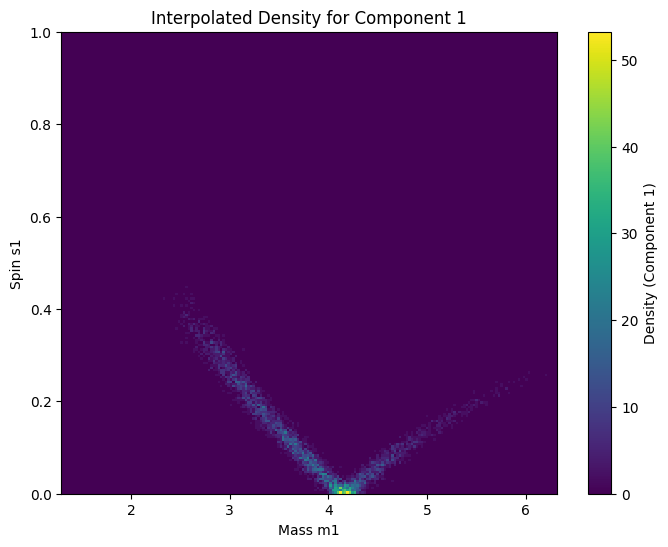

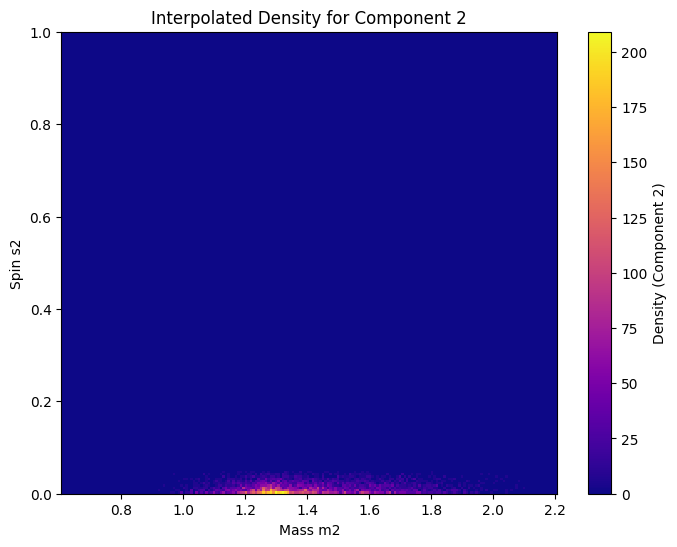

In [13]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define grid for mass and spin
# -----------------------------
mass_vals1 = np.linspace(xcenters1[0], xcenters1[-1], 200)
spin_vals1 = np.linspace(ycenters1[0], ycenters1[-1], 200)
M1, S1 = np.meshgrid(mass_vals1, spin_vals1)

mass_vals2 = np.linspace(xcenters2[0], xcenters2[-1], 200)
spin_vals2 = np.linspace(ycenters2[0], ycenters2[-1], 200)
M2, S2 = np.meshgrid(mass_vals2, spin_vals2)

# -----------------------------
# 2. Evaluate density on the grid
# -----------------------------
Z1 = np.array([density_m1(m, s) for m, s in zip(M1.ravel(), S1.ravel())]).reshape(M1.shape)
Z2 = np.array([density_m2(m, s) for m, s in zip(M2.ravel(), S2.ravel())]).reshape(M2.shape)

# -----------------------------
# 3. Plot component 1
# -----------------------------
plt.figure(figsize=(8,6))
plt.pcolormesh(M1, S1, Z1, shading='auto', cmap='viridis')
plt.colorbar(label='Density (Component 1)')
plt.xlabel('Mass m1')
plt.ylabel('Spin s1')
plt.title('Interpolated Density for Component 1')
plt.show()

# -----------------------------
# 4. Plot component 2
# -----------------------------
plt.figure(figsize=(8,6))
plt.pcolormesh(M2, S2, Z2, shading='auto', cmap='plasma')
plt.colorbar(label='Density (Component 2)')
plt.xlabel('Mass m2')
plt.ylabel('Spin s2')
plt.title('Interpolated Density for Component 2')
plt.show()
